# Pakistani EDA

In [75]:
import numpy as np
import pandas as pd
import sklearn.preprocessing 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import string
import nltk
from nltk.corpus import stopwords
from textblob import Word
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import wordcloud
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split 
from keras.utils import np_utils
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
sns.set()

In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
df=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Thesis/excel files/Bpd.xlsx") 

In [78]:
df.head()

,Cases,Diagnosis,Mood-Stabilizer,Antipsychotic,Sleeping pills
0,Patient displayed aggressive and violent behav...,Bipolar I,Lithium,Seroquel,Rivotril
1,The patient exhibited aggressive and violent b...,Bipolar I,Lithium,Seroquel,Rivotril
2,The patient had ADHD like systems and extremel...,Bipolar I,Lithium,Seroquel,Rivotril
3,The patient lacks the attention span and obser...,Bipolar I,Lithium,Seroquel,Rivotril
4,The patient showed several inability to focus ...,Bipolar I,Lithium,Seroquel,Rivotril


In [79]:
df.tail()

,Cases,Diagnosis,Mood-Stabilizer,Antipsychotic,Sleeping pills
145,"The patient experienced extreme mood swings, c...",BipolarII,Epival,Risperidone,None
146,"The patient beat his family in a crazy frenzy,...",BipolarII,Epival,Risperidone,None
147,The patient was addicted to drugs in a manic p...,BipolarII,Epival,Risperidone,None
148,"The patient lived in isolation, playing video ...",BipolarII,Epival,Risperidone,None
149,The patient violently attacked a classmate dur...,BipolarII,Epival,Risperidone,None


In [80]:
df['Diagnosis'].value_counts()

Bipolar I    75
BipolarII    75
Name: Diagnosis, dtype: int64

In [81]:
df['Mood-Stabilizer'].value_counts()

Lithium    75
Epival     75
Name: Mood-Stabilizer, dtype: int64

In [82]:
df['Antipsychotic'].value_counts()

Risperidone    75
Seroquel       75
Name: Antipsychotic, dtype: int64

In [83]:
df.dtypes

Cases              object
Diagnosis          object
Mood-Stabilizer    object
Antipsychotic      object
Sleeping pills     object
dtype: object

In [84]:
df.shape

(150, 5)

In [85]:
df.describe()

,Cases,Diagnosis,Mood-Stabilizer,Antipsychotic,Sleeping pills
count,150,150,150,150,150
unique,150,2,2,2,2
top,Most of the time the patient had suicidal thou...,Bipolar I,Lithium,Risperidone,Rivotril
freq,1,75,75,75,75


Text(0.5, 1.0, 'Diagnosis')

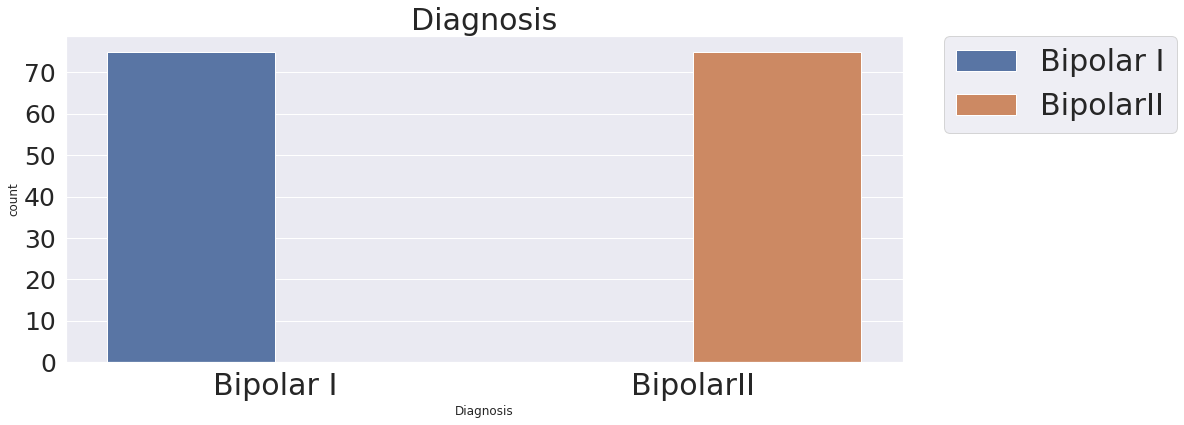

In [86]:
plt.figure(figsize=(15,6))
sns.countplot(x="Diagnosis",hue="Diagnosis",data=df,)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size': 30})
plt.xticks(fontsize=30)
plt.yticks(fontsize=25)
plt.title("Diagnosis",fontsize=30)

Text(0.5, 1.0, 'Mood Stabilizer')

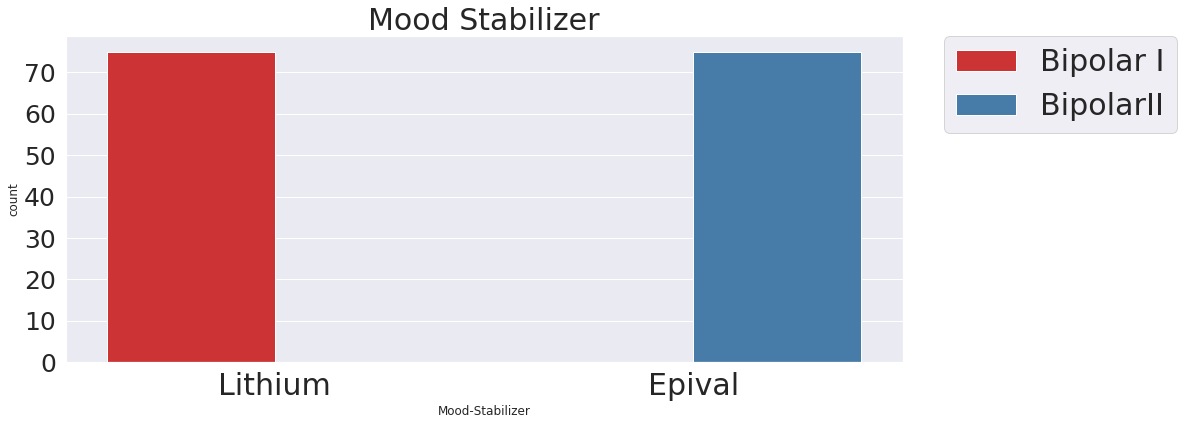

In [87]:
plt.figure(figsize=(15,6))
sns.countplot(x="Mood-Stabilizer",hue="Diagnosis",data=df,palette="Set1")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size': 30})
plt.xticks(fontsize=30)
plt.yticks(fontsize=25)
plt.title("Mood Stabilizer",fontsize=30)

Text(0.5, 1.0, 'Antipsychotic')

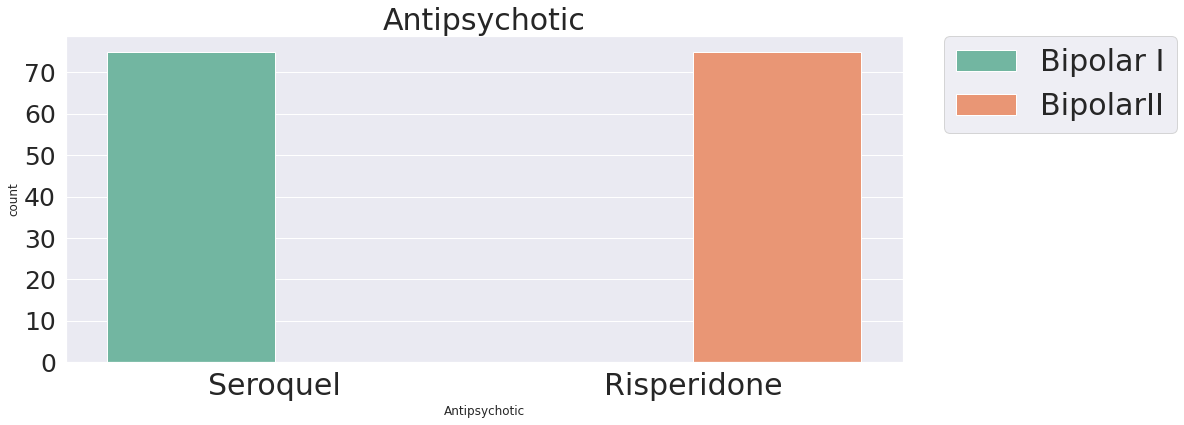

In [88]:
plt.figure(figsize=(15,6))
sns.countplot(x="Antipsychotic",hue="Diagnosis",data=df,palette="Set2")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size': 30})
plt.xticks(fontsize=30)
plt.yticks(fontsize=25)
plt.title("Antipsychotic",fontsize=30)

Text(0.5, 1.0, 'Sleeping Pills')

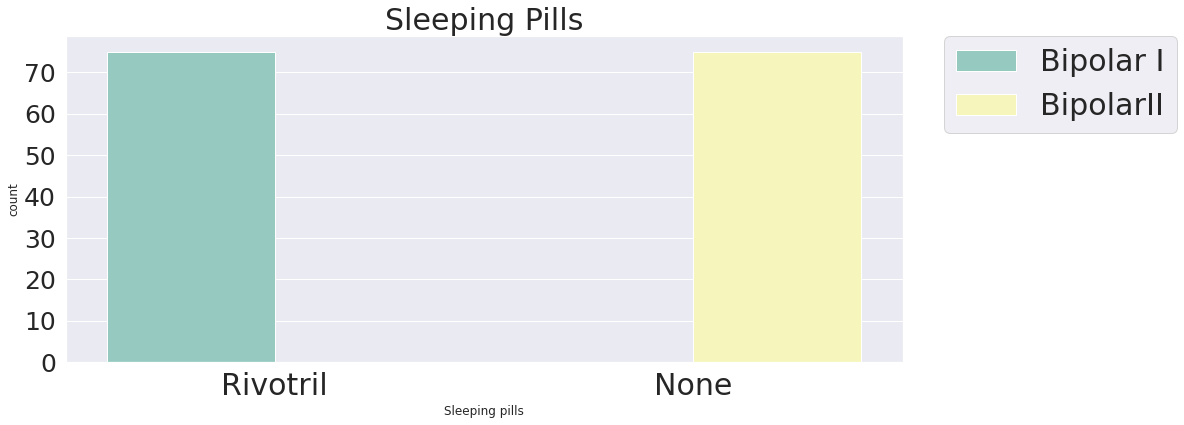

In [89]:
plt.figure(figsize=(15,6))
sns.countplot(x="Sleeping pills",hue="Diagnosis",data=df,palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size': 30})
plt.xticks(fontsize=30)
plt.yticks(fontsize=25)
plt.title("Sleeping Pills",fontsize=30)

In [90]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

In [91]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [92]:
df1 = df[['Cases','Diagnosis']]
df1.isnull().sum()

Cases        0
Diagnosis    0
dtype: int64

In [93]:
df1.head()

,Cases,Diagnosis
0,Patient displayed aggressive and violent behav...,Bipolar I
1,The patient exhibited aggressive and violent b...,Bipolar I
2,The patient had ADHD like systems and extremel...,Bipolar I
3,The patient lacks the attention span and obser...,Bipolar I
4,The patient showed several inability to focus ...,Bipolar I


In [94]:
df1.tail()

,Cases,Diagnosis
145,"The patient experienced extreme mood swings, c...",BipolarII
146,"The patient beat his family in a crazy frenzy,...",BipolarII
147,The patient was addicted to drugs in a manic p...,BipolarII
148,"The patient lived in isolation, playing video ...",BipolarII
149,The patient violently attacked a classmate dur...,BipolarII


In [95]:
    #lower casing
    df['Cases'] = df['Cases'].str.lower()

    #punctuation removal         
    df["Cases"] = df["Cases"].apply(lambda text: remove_punctuation(text))

In [96]:
df2=df1

In [97]:
tokenizer = Tokenizer(num_words=500, split=' ') 
tokenizer.fit_on_texts(df2['Cases'].values)
X = tokenizer.texts_to_sequences(df2['Cases'].values)
X = pad_sequences(X)

In [98]:
df2['encoded']=df2['Diagnosis'].apply(lambda x: 0 if x=='Bipolar I' else 1)
df2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Cases,Diagnosis,encoded
0,Patient displayed aggressive and violent behav...,Bipolar I,0
1,The patient exhibited aggressive and violent b...,Bipolar I,0
2,The patient had ADHD like systems and extremel...,Bipolar I,0
3,The patient lacks the attention span and obser...,Bipolar I,0
4,The patient showed several inability to focus ...,Bipolar I,0


In [99]:
from sklearn.model_selection import train_test_split#stratify ensures balance between spam and no spam in test and train
xtrain, xtest, ytrain, ytest =train_test_split(X, df2['encoded'], 
                                random_state=2018, 
                                test_size=0.3, 
                                stratify=df2['encoded'])

In [100]:
from sklearn.ensemble import AdaBoostClassifier
MLmodel1=AdaBoostClassifier(random_state=100)
from sklearn.tree import DecisionTreeClassifier
MLmodel2 = DecisionTreeClassifier(random_state=100,criterion='gini',min_samples_split=2,splitter='random',max_depth=10)
from sklearn.ensemble import RandomForestClassifier
MLmodel3  = RandomForestClassifier(random_state=100,n_estimators=1,min_samples_split=10)
from sklearn.ensemble import AdaBoostClassifier
MLmodel4=AdaBoostClassifier(random_state=100)

In [101]:
MLmodel1.fit(xtrain,ytrain)
MLmodel2.fit(xtrain,ytrain)
MLmodel3.fit(xtrain,ytrain)
MLmodel4.fit(xtrain,ytrain)

AdaBoostClassifier(random_state=100)

In [102]:
predict1=MLmodel1.predict(xtest)
predict2=MLmodel2.predict(xtest)
predict3=MLmodel3.predict(xtest)
predict4=MLmodel4.predict(xtest)

In [103]:
from sklearn.metrics import accuracy_score
accuracy1=accuracy_score(ytest,predict1)
accuracy2=accuracy_score(ytest,predict2)
accuracy3=accuracy_score(ytest,predict3)
accuracy4=accuracy_score(ytest,predict4)
print(accuracy1)
print(accuracy2)
print(accuracy3)
print(accuracy4)

0.7111111111111111
0.6444444444444445
0.5555555555555556
0.7111111111111111


In [104]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [105]:
precision1=accuracy_score(ytest,predict1)
precision2=accuracy_score(ytest,predict2)
precision3=accuracy_score(ytest,predict3)
precision4=accuracy_score(ytest,predict4)
print(precision1)
print(precision2)
print(precision3)
print(precision4)

0.7111111111111111
0.6444444444444445
0.5555555555555556
0.7111111111111111


In [106]:
recall1=accuracy_score(ytest,predict1)
recall2=accuracy_score(ytest,predict2)
recall3=accuracy_score(ytest,predict3)
recall4=accuracy_score(ytest,predict4)
print(recall1)
print(recall2)
print(recall3)
print(recall4)

0.7111111111111111
0.6444444444444445
0.5555555555555556
0.7111111111111111


In [107]:
f11=f1_score(ytest,predict1)
f12=f1_score(ytest,predict2)
f13=f1_score(ytest,predict3)
f14=f1_score(ytest,predict4)
print(f11)
print(f12)
print(f13)
print(f14)

0.6666666666666667
0.6190476190476191
0.5
0.6666666666666667
